In [35]:
!pip install gymnasium

In [36]:
# استيراد المكتبات اللازمة
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
# مكتبة العرض
from IPython.display import display, clear_output

In [37]:
# تهيئة البيئة
env = gym.make("Taxi-v3", render_mode="rgb_array")

In [38]:
# تهبئة جدول القيم
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# معاملات خوارزمية التعلم النوعي
learning_rate = 0.1  # معدل التعلم
discount_factor = 0.9  # عامل الخصم
epsilon_start = 1.0  # قيمة إبسيلون للبداية
epsilon_min = 0.1  # الحد الأدنى لقيمة إبسيلون
epsilon_decay = 0.99995  # تقليل إبسيلون تدريجيًا مع مرور الحلقات


# دالة لاختيار الفعل باستخدام إبسيلون
def epsilon_greedy(state, epsilon):
    # إذا كان العدد العشوائي أقل من إبسيلون، نستكشف
    if np.random.rand() < epsilon:
        # اختيار فعل عشوائي
        return env.action_space.sample()
    # إذا كان العدد العشوائي أكبر من إبسيلون، نستخدم المعرفة السابقة
    else:
        # اختيار الفعل الذي له أعلى قيمة
        return np.argmax(q_table[state])


In [39]:
# عدد الحلقات التدريبية
num_episodes = 100000
epsilon=epsilon_start

In [40]:
# حلقة التدريب الرئيسية
for episode in range(num_episodes):
    # إعادة تهيئة البيئة في بداية كل حلقة
    state, info = env.reset()
    done = False
    # المكافأة الإجمالية للحلقة
    total_reward = 0

    # حلقة لتحديث القيم بناءً على الأفعال التي يتم اتخاذها
    while not done:
        # اختيار الفعل
        action = epsilon_greedy(state, epsilon)
        # تطبيق الفعل
        next_state, reward, terminated, truncated, info = env.step(action)

        # تحديث القيمة في الجدول
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action])
        # الانتقال للحالة التالية
        state = next_state
        # إضافة المكافأة إلى إجمالي مكافآت الحلقة
        total_reward += reward

        # التحقق مما إذا كانت الحلقة قد انتهت
        if terminated or truncated:
            done = True  # نهاية الحلقة
    # تقليل إبسيلون مع تقدم الحلقات
    epsilon = max(epsilon_min, epsilon * epsilon_decay )


    # طباعة التقدم كل 10000 حلقة لتتبع الأداء
    if (episode + 1) % 10000 == 0:
        print(f"Episode {episode+1}/{num_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")
print(q_table)

Episode 10000/100000, Total Reward: -55, Epsilon: 0.6065
Episode 20000/100000, Total Reward: -17, Epsilon: 0.3679
Episode 30000/100000, Total Reward: -5, Epsilon: 0.2231
Episode 40000/100000, Total Reward: 10, Epsilon: 0.1353
Episode 50000/100000, Total Reward: -2, Epsilon: 0.1000
Episode 60000/100000, Total Reward: -7, Epsilon: 0.1000
Episode 70000/100000, Total Reward: 3, Epsilon: 0.1000
Episode 80000/100000, Total Reward: 8, Epsilon: 0.1000
Episode 90000/100000, Total Reward: -9, Epsilon: 0.1000
Episode 100000/100000, Total Reward: 4, Epsilon: 0.1000
[[ 0.          0.          0.          0.          0.          0.        ]
 [-0.58568212  0.4603532  -0.58568212  0.4603532   1.62261467 -8.5396468 ]
 [ 4.348907    5.94323     4.348907    5.94323     7.7147     -3.05677   ]
 ...
 [ 7.7147      9.683       7.7147      5.94323    -1.2853     -1.2853    ]
 [ 1.62261467  2.9140163   1.62261467  2.9140163  -7.37738533 -7.37738533]
 [14.3        11.87       14.3        17.          5.3      

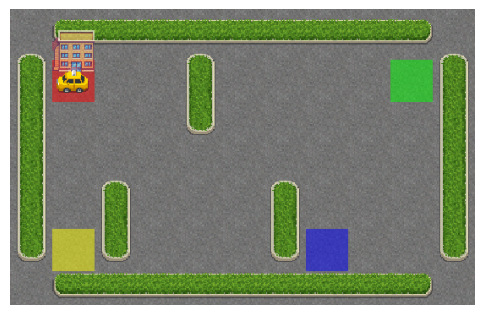

Total Reward after Test: 9


In [41]:
# اختبار التعلم بعد اكتمال التدريب
 # إعادة تهيئة البيئة للاختبار بعد التدريب
state, info = env.reset()
done = False
total_reward = 0

# إنشاء الشكل لعرض البيئة
fig, ax = plt.subplots(figsize=(6, 6))

# حلقة الاختبار لتقييم أداء الوكيل بعد التدريب
while not done:
    action = np.argmax(q_table[state])  # اختيار أفضل فعل من جدول
    # اتخاذ الفعل واكتساب المكافأة
    next_state, reward, terminated, truncated, info = env.step(action)

    # الحصول على الإطار (الصورة) من البيئة
    frame = env.render()

    # تحديث الرسم البياني بالإطار الجديد
    ax.clear()  # مسح الإطار السابق
    ax.imshow(frame)  # عرض الإطار الحالي
    ax.axis('off')  # إخفاء المحاور لتوفير عرض أفضل

    # مسح الإطار السابق وعرض الشكل الجديد
    clear_output(wait=True)  # مسح الإطار السابق من العرض
    display(fig)  # عرض الشكل الجديد
    plt.pause(5)  # الانتظار لفترة قصيرة لإنشاء تأثير الحركة

    total_reward += reward  # جمع المكافآت خلال الاختبار
    state = next_state  # الانتقال إلى الحالة التالية

    # التحقق مما إذا كانت الحلقة قد انتهت
    if terminated or truncated:
        done = True

# طباعة المكافأة الإجمالية بعد اختبار الوكيل
print(f"Total Reward after Test: {total_reward}")

# إغلاق البيئة بعد الانتهاء من الاختبار
env.close()